# Workflow:
- Initialize all variables
- Load boundary conditions
- Load constants

Iteratively:
- Step forward in time (update prognostic variables)
- Update diagnostic variables
- Save variables for plotting

In [4]:
import numpy as np
from time_step import dState
import matplotlib.pyplot as plt

State_0 = np.array([10., 10., 20., 35., 34., 34., 0.]) #[T_u, T_l, T_e, S_u, S_l, S_e, h_ice]

current_state = State_0
dt = 1 #day

T_u=[]
T_l=[]
T_e=[]
S_u=[]
S_l=[]
S_e=[]

h=[]
for day in range(1, 1000):
    current_state[:-1] += dState(current_state, day)[:-1] * dt #simplest possible Euler integration
    current_state[-1] = dState(current_state, day)[-1]
    h.append(current_state[-1])
    
    T_u.append(current_state[0])
    T_l.append(current_state[1])
    T_e.append(current_state[2])

    S_u.append(current_state[3])
    S_l.append(current_state[4])
    S_e.append(current_state[5])


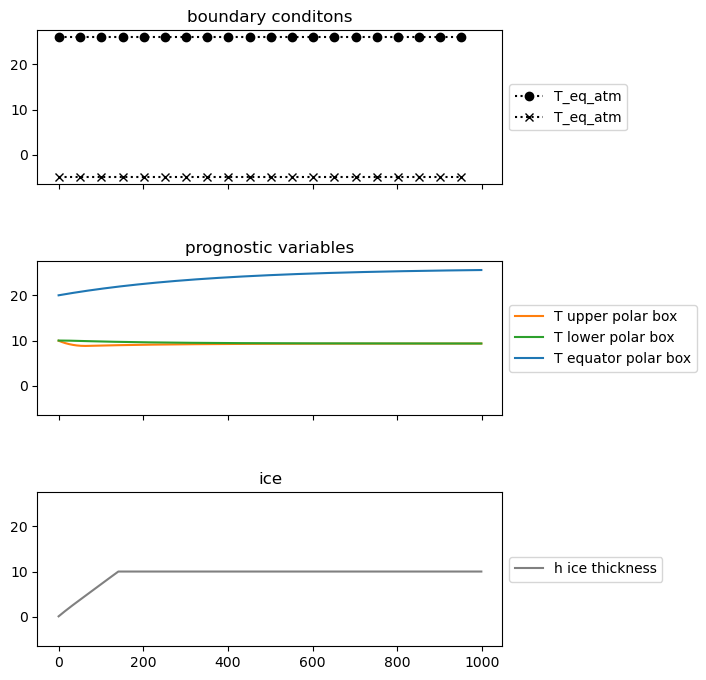

In [2]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(6,8), sharey=True, sharex=True, gridspec_kw={'hspace':0.5})

axs[0].set_title('boundary conditons')
day, T_atm_pole, T_atm_eq = np.genfromtxt('simulation.const_freezing.csv', delimiter=',', skip_header=1, unpack=True)
axs[0].plot(day[::50], T_atm_eq[::50], color='k', ls=':', marker='o', label='T_eq_atm')
axs[0].plot(day[::50], T_atm_pole[::50], color='k', ls=':', marker='x', label='T_eq_atm')

axs[1].set_title('prognostic variables')
axs[1].plot(T_u, color='C1', label='T upper polar box')
axs[1].plot(T_l, color='C2', label='T lower polar box')
axs[1].plot(T_e, color='C0', label='T equator polar box')

axs[2].set_title('ice')
axs[2].plot(h, color='grey', label='h ice thickness')

for ax in axs:
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5))

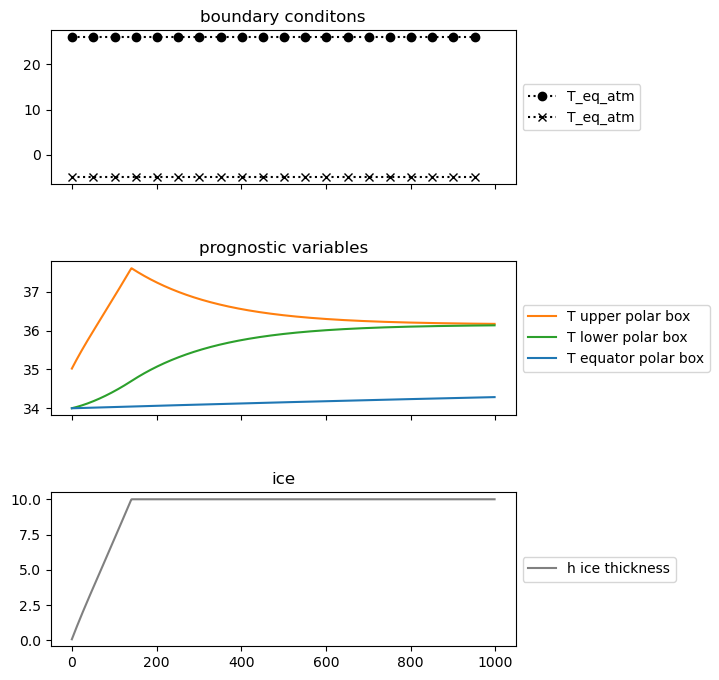

In [6]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(6,8), sharey=False, sharex=True, gridspec_kw={'hspace':0.5})

axs[0].set_title('boundary conditons')
day, T_atm_pole, T_atm_eq = np.genfromtxt('simulation.const_freezing.csv', delimiter=',', skip_header=1, unpack=True)
axs[0].plot(day[::50], T_atm_eq[::50], color='k', ls=':', marker='o', label='T_eq_atm')
axs[0].plot(day[::50], T_atm_pole[::50], color='k', ls=':', marker='x', label='T_eq_atm')

axs[1].set_title('prognostic variables')
axs[1].plot(S_u, color='C1', label='T upper polar box')
axs[1].plot(S_l, color='C2', label='T lower polar box')
axs[1].plot(S_e, color='C0', label='T equator polar box')

axs[2].set_title('ice')
axs[2].plot(h, color='grey', label='h ice thickness')

for ax in axs:
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5))